0.3444951698634502


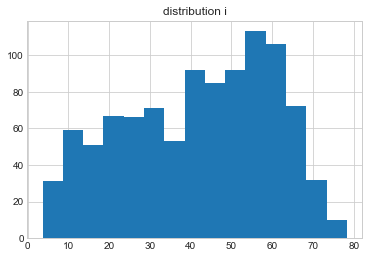

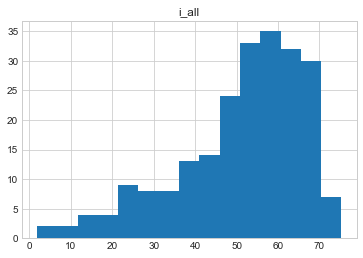

In [16]:
#that'll allow you to create fake pop of biased cosI's
#run it through code to create fake observed population
#compare to real population using KS test
#make grid varying c from -3 to 3 in 0.1 steps and record KS pvalue each time
#make plot of these values v c

#QUESTIONS/VERIFY: do I create a fake population for each value of c
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_linear_regression
import csv
import pandas
import statistics
import random
import math
from scipy.stats import ks_2samp
from scipy.stats import arcsine

#generate fake truths
# generate observed values
data = genfromtxt('starsData.csv',delimiter=',',dtype='float')
#cols: vsini, e_vsini, prot, e_prot, radius, e_r
#e_prot of 0 means no error given
rows,cols=data.shape

RSun = 695700



IsummaryMedian = []
IsummaryMean = []

runMonte(data,IsummaryMedian,IsummaryMean)
with open("distribution.txt", 'w') as f:
    for num in IsummaryMedian:
        f.write(str(num)+'\n')

pValue = KSTest()
print(pValue)

plt.hist(IsummaryMedian, bins = 15)
plt.title('distribution i')
plt.show()

i_all = fileToList('i_all.txt')
plt.hist(i_all, bins = 15)
plt.title('i_all')
plt.show()



In [1]:
def runMonte(data,IsummaryMedian,IsummaryMean):
    for j in range(0,1000):
        #Rtrue = np.random.normal(random.choice(data[:,4]),random.choice(data[:,5]))
        #Ptrue = np.random.normal(random.choice(data[:,2]),random.choice(data[:,3]))
        index1 = random.randint(0,224)
        Rtrue = data[index1,4]
        e_Rtrue = data[index1,5]

        index2 = random.randint(0,224)
        Ptrue = data[index2,2]
        e_Ptrue = data[index2,3]
        Vtrue = 2*np.pi*Rtrue*RSun/(Ptrue*24*3600)

        cosI_random = truncnorm.rvs(0, 1)
       # cosI_random = arcsine.rvs(0,1)
        
        Itrue = np.arccos(cosI_random)

        VSINItrue = Vtrue*np.sin(Itrue)

        e_VSINIobs = random.choice(data[:,1])
        VSINIobs = np.random.normal(VSINItrue,e_VSINIobs)
        Robs = np.random.normal(Rtrue,e_Rtrue)
        e_Robs = e_Rtrue
        Pobs = np.random.normal(Ptrue,e_Ptrue)
        e_Pobs = e_Ptrue

        Pmonte = np.random.normal(Pobs,e_Pobs,10000)
        Rmonte = np.random.normal(Robs,e_Robs,10000)
        VSINImonte = np.random.normal(VSINIobs,e_VSINIobs,10000)

        iSINImonte = VSINImonte/(2*np.pi*Rmonte*RSun/(Pmonte*24*3600))
        SINImonte = []

        for num in iSINImonte:
            if num>= 0 and num <=1:
                SINImonte.append(num)

        Imonte = np.arcsin(SINImonte)

        for i in range(0,len(Imonte)):
            Imonte[i]=math.degrees(Imonte[i])

        IsummaryMedian.append(statistics.median(Imonte))
        IsummaryMean.append(statistics.mean(Imonte))
        #print('done')


In [4]:
def KSTest():
    i_all = fileToList('i_all.txt')
    i_modBeta = fileToList('distribution.txt')
    result = ks_2samp(i_all,i_modBeta)
    return result.pvalue
    #need to return pvalue


In [12]:
def fileToList(name):
    my_file = open(name, "r")
    content = my_file.read()
    content_list = content.strip().split("\n")
    my_file.close()
    
    for i in range(len(content_list)):
        content_list[i]=float(content_list[i])
    return content_list